# 패턴인식 첫번째 프로젝트

In [75]:
import input_data
import numpy as np
import sys
import os, os.path
from array import array
import pandas as pd
import gzip
import urllib.request as req
import struct

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
from struct import *
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [74]:
import urllib.request as req
import gzip, os, os.path

savepath = "./mnist"
baseurl = "http://yann.lecun.com/exdb/mnist"
files = [
	"train-images-idx3-ubyte.gz",
	"train-labels-idx1-ubyte.gz",
	"t10k-images-idx3-ubyte.gz",
	"t10k-labels-idx1-ubyte.gz"]

if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
	url = baseurl + "/" + f
	loc = savepath + "/" + f
	print("download:", url)
	if not os.path.exists(loc):
		req.urlretrieve(url, loc)

for f in files:
	gz_file = savepath + "/" + f
	raw_file = savepath + "/" + f.replace(".gz", "")
	print("gzip:", f)
	with gzip.open(gz_file, "rb") as fp:
		body = fp.read()
		with open(raw_file, "wb") as w:
			w.write(body)

print("ok")
## https://teeeeeeemo.tistory.com/42 블로그 참조

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [55]:
import struct

def to_csv(name, maxdata):
	lbl_f = open("./mnist/"+name+"-labels-idx1-ubyte", "rb")
	img_f = open("./mnist/"+name+"-images-idx3-ubyte", "rb")
	csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")

	mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
	mag, img_count = struct.unpack(">II", img_f.read(8))
	rows, cols = struct.unpack(">II", img_f.read(8))
	pixels = rows * cols

	res = []
	for idx in range(lbl_count):
		if idx > maxdata: break
		label = struct.unpack("B", lbl_f.read(1))[0]
		bdata = img_f.read(pixels)
		sdata = list(map(lambda n: str(n), bdata))
		csv_f.write(str(label)+",")
		csv_f.write(",".join(sdata)+"\r\n")

		if idx < 10:
			s = "P2 28 28 255\n"
			s += " ".join(sdata)
			iname = "./mnist/{0}-{1}-{2}.pgm".format(name, idx, label)
			with open(iname, "w", encoding="utf-8") as f:
				f.write(s)
	csv_f.close()
	lbl_f.close()
	img_f.close()

to_csv("train", 60000)
to_csv("t10k", 1000)

## https://teeeeeeemo.tistory.com/42 블로그 참조

## MNIST DATA CSV 파일로 만든 뒤 불러오기

In [240]:
df = pd.read_csv('./mnist/train.csv')
column = []
column.append('tag')
for i in range(1,785):
    column.append(i)
df.columns = column
b = df.drop('tag',axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

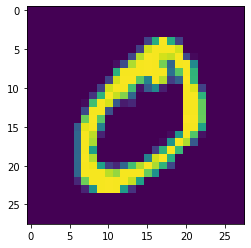

In [249]:
image = b.T[0].values.reshape(28,28)
#img = image.values.reshape(28,28)
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

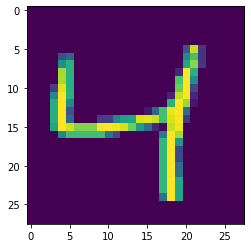

In [250]:
image = b.T[1].values.reshape(28,28)
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

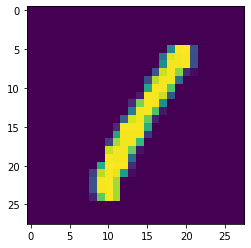

In [251]:
image = b.T[2].values.reshape(28,28)
plt.imshow(image)
plt.show

## DATA normalization 후 covariance matrix 구하기

In [58]:
x_std = StandardScaler().fit_transform(b)
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)
covariance_matrix.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(784, 784)

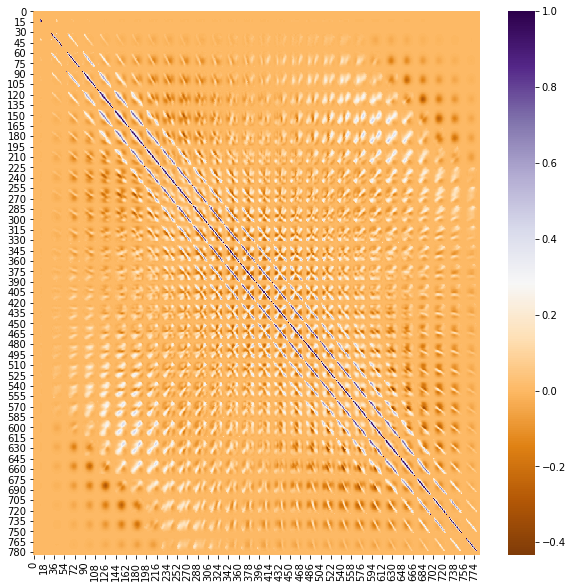

In [59]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(covariance_matrix), annot=False, cmap='PuOr')
plt.show()

In [60]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print ("Eigenvals shape: "+str(eig_vals.shape))
print ("Eigenvecs shape: "+str(eig_vecs.shape))

Eigenvals shape: (784,)
Eigenvecs shape: (784, 784)


In [61]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [62]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[ 4.04879522e+01  2.92418826e+01  2.68120471e+01  2.06861667e+01
  1.80768493e+01  1.57335555e+01  1.37907898e+01  1.25177109e+01
  1.10069491e+01  1.00506591e+01  9.62060072e+00  8.63113407e+00
  7.99180456e+00  7.81423824e+00  7.37548917e+00  7.13068048e+00
  6.71326810e+00  6.60363859e+00  6.40634233e+00  6.23722524e+00
  5.93203443e+00  5.76066446e+00  5.48421547e+00  5.31865091e+00
  5.12873847e+00  4.96094870e+00  4.90538041e+00  4.70830714e+00
  4.52925634e+00  4.39475181e+00  4.27527777e+00  4.21406925e+00
  4.09839381e+00  4.03206216e+00  3.97720780e+00  3.86042989e+00
  3.80868785e+00  3.72566415e+00  3.64396084e+00  3.44178438e+00
  3.41624470e+00  3.36376434e+00  3.25768833e+00  3.23622704e+00
  3.20480879e+00  3.17913695e+00  3.14209332e+00  3.08595628e+00
  3.06067580e+00  3.03762298e+00  2.90165958e+00  2.86408643e+00
  2.84982613e+00  2.82378562e+00  2.76634190e+00  2.71777054e+00
  2.69167365e+00  2.65853093e+00  2.61670152e+00  2.57616306e+00
  2.5266335

In [252]:
eig_vals[0] / sum(eig_vals)

0.056467611385863994

In [64]:
ll = []
for i in range(len(eig_vals)):
    ll.append(float(eig_vals[i]/sum(eig_vals)))
    #print(float(eig_vals[i]/sum(eig_vals)))

<BarContainer object of 784 artists>

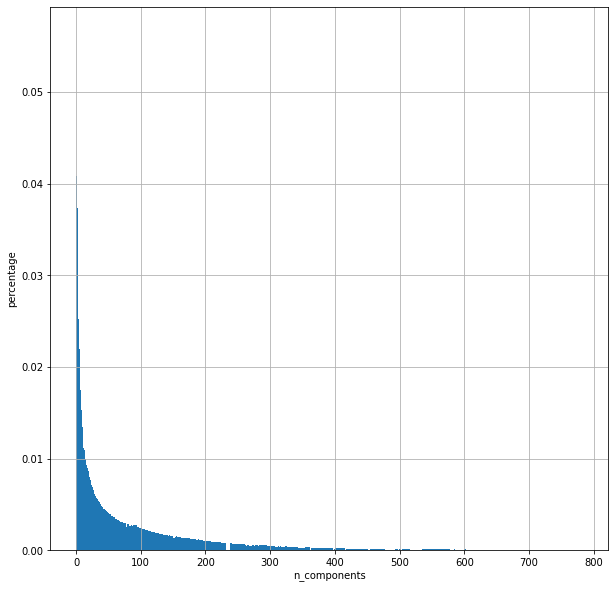

In [79]:
plt.figure(figsize=(10,10))
plt.xlabel('n_components')
plt.ylabel('percentage')
plt.grid()
plt.bar(range(len(ll)),ll,alpha=1,width=1)

In [255]:
cum_var = 0
for i, v in enumerate(ll):
    cum_var = cum_var + v
    if cum_var > 0.9:
        print("90% variance:", i) 
        break

90% variance: 240


In [67]:
cum_var_explained = np.cumsum(ll)

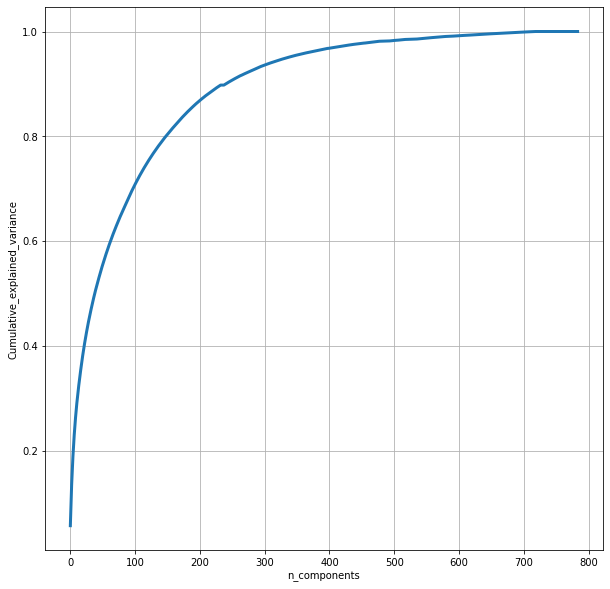

In [71]:
plt.figure(1, figsize=(10, 10))
plt.clf()
plt.plot(cum_var_explained, linewidth=3)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

## Eigen Face

In [256]:
sklearn_pca = PCA(n_components=335).fit(x_std)

In [257]:
print (sklearn_pca.components_.shape)

(335, 784)


In [258]:
print(sklearn_pca.components_)

[[ 1.35092785e-17 -1.21269304e-18 -3.78417595e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.53609842e-17  2.22525269e-18  1.89558793e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.68452043e-17  8.90743228e-18  9.76766495e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.49153496e-17 -9.81218924e-18  2.67558631e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 6.96583146e-18  7.28905094e-18 -1.56995316e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-5.42938650e-18 -4.51083176e-17  8.74928911e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [259]:
matW = sklearn_pca.components_.T
matW.shape

(784, 335)

In [260]:
b.shape

(59999, 784)

In [261]:
Z = np.dot(b,matW)
Z.shape

(59999, 335)

In [263]:
final_list = []
X_digit = []
Z_digit = []
Xhat_digit = []
for i in range(0,59999):
    X_digit1 = x_std[i]
    X_digit.append(X_digit1)
    Z_digit1 = X_digit1.dot(matW)
    Z_digit.append(Z_digit1)
    Xhat_digit1 = Z_digit1.dot(matW.T)
    Xhat_digit.append(Xhat_digit1)
    mse = ((Xhat_digit1 - X_digit1)**2).mean(axis=None)
    #print(i)
    final_list.append(mse)

In [264]:
final_list

[0.025067654164428323,
 0.08528030585646498,
 0.013716504645896911,
 0.04167512541221968,
 0.045194399485952864,
 0.016913019809800766,
 0.029829563516787283,
 0.01225925220108732,
 0.039246902399057745,
 0.02200184133586253,
 0.04018230736697921,
 0.07299338396223273,
 0.037777139990855725,
 0.012507407156437115,
 0.033921156827851545,
 0.08949678968541996,
 0.01850010415717914,
 0.045802305801818086,
 0.030185571150120542,
 0.08823160337363067,
 0.03248566753157961,
 0.033715284247490825,
 0.013692998150317697,
 0.03099936825608395,
 0.044293885552984365,
 0.0244996805028182,
 0.04506249855835718,
 0.16069086866564405,
 0.22291126068044115,
 0.07492357617853639,
 0.03006565488213332,
 0.032445365102220555,
 0.0667231948553752,
 0.02577037157534957,
 0.0414110825035005,
 0.021199945226855626,
 0.031074441890898155,
 0.04159456750833366,
 0.020663002821008594,
 0.009185655646045883,
 0.02358463435188716,
 0.020009792638218157,
 0.016640555747723225,
 0.03906961711878347,
 0.01837969351

<function matplotlib.pyplot.show(close=None, block=None)>

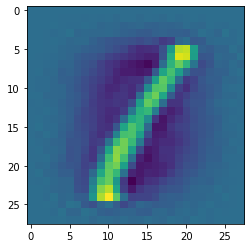

In [237]:
X_digit1 = x_std[2]
Z_digit1 = X_digit1.dot(matW)
Xhat_digit1 = Z_digit1.dot(matW.T)
test1 = Xhat_digit1.reshape(28,28)
plt.imshow(test1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

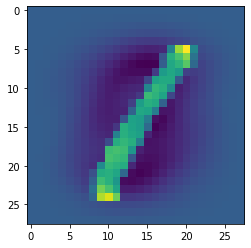

In [236]:
test = x_std[2].reshape(28,28)
#print(test)
plt.imshow(test)
plt.show

In [266]:
count = 0
for i in final_list:
    if i < 0.1:
        count = count + 1
    else:
        count = count
print(count/600 ,"%")

94.92 %
